In [1]:
import numpy as np 
import pandas as pd 
from keras.models import Sequential 
from keras.layers.core import Dense, Activation 
from keras.optimizers import Adam 
from keras.callbacks import EarlyStopping 
import matplotlib.pyplot as plt 
%matplotlib inline 

C:\Users\Administrator\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
MNIST = np.load('MNIST_train_1000.npz')
images = MNIST['train_images']
labels = MNIST['train_labels']
print(images.shape)
print(labels.shape)

(1000, 28, 28)
(1000,)


In [3]:
tally = pd.Series(labels).value_counts()
acc_baseline = tally.max()/tally.sum()
print('baseline accuracy rate is',acc_baseline)

baseline accuracy rate is 0.505


In [4]:
X = images.reshape(1000,28*28)
P = pd.get_dummies(pd.DataFrame(labels,columns=['digit'],dtype='category')).values

In [5]:
epochs = 1000
model = Sequential()
model.add(Dense(32,input_shape=(28*28,)))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(8))
model.add(Activation('relu'))
model.add(Dense(4))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer='SGD',
             metrics=['accuracy'])
hist = model.fit(X,P,epochs=epochs,validation_split =0.2,verbose=0,callbacks=[EarlyStopping(patience=10)])

Text(0.5,1,'cross-entropy')

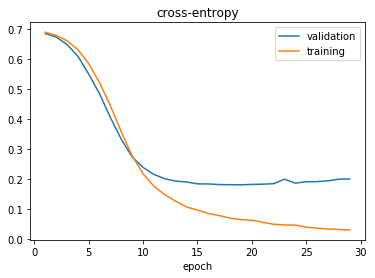

In [6]:
results = pd.DataFrame() 
results['epoch'] = hist.epoch 
results['epoch'] = results['epoch'] + 1 
results['training loss'] = hist.history['loss'] 
results['validation loss'] = hist.history['val_loss'] 
results['training acc'] = hist.history['acc'] 
results['validation acc'] = hist.history['val_acc'] 
results['validation']=hist.history['val_loss']
results['training']=hist.history['loss'] 

ax = results.plot.line(x='epoch',y='validation')
results.plot.line(x='epoch',y='training',ax=ax)
plt.title('cross-entropy')

In [7]:
ix = results['validation loss'].idxmin() 
ce_training = results['training loss'].iloc[ix] 
ce_validation = results['validation loss'].iloc[ix] 
acc_training = results['training acc'].iloc[ix] 
acc_validation = results['validation acc'].iloc[ix] 
print() 
print('minimum validation loss index',ix,'of',epochs) 
print('cross-entropy') 
print(' training =',ce_training) 
print(' validation =',ce_validation) 
print('accuracy rate') 
print(' training =',acc_training) 
print(' validation =',acc_validation) 
print(' baseline =',acc_baseline)


minimum validation loss index 18 of 1000
cross-entropy
 training = 0.06527203045785428
 validation = 0.18124476253986357
accuracy rate
 training = 0.98625
 validation = 0.94
 baseline = 0.505


In [8]:
MNIST = np.load('MNIST_test_1000.npz')
X_test = MNIST['test_images'].reshape(1000,28*28)
P_test = pd.get_dummies(pd.DataFrame(MNIST['test_labels'],columns=['digit'],dtype='category')).values

test acc 0.955
errors 45


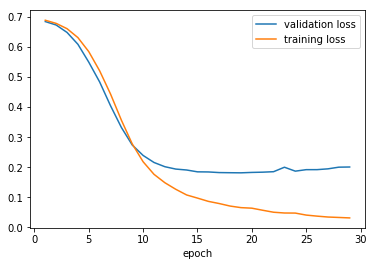

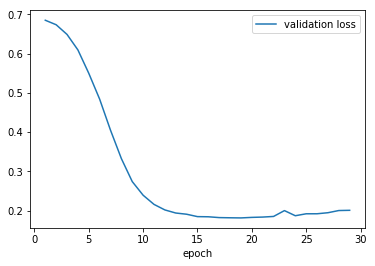

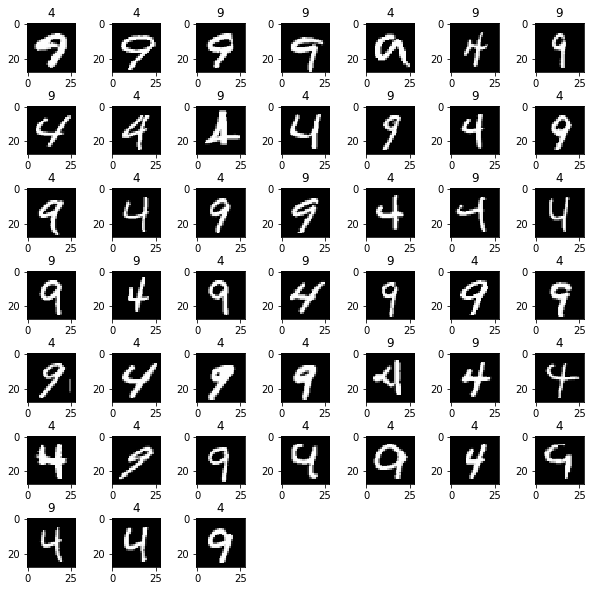

In [12]:
ax = results.plot.line(x='epoch',y='validation loss') 
results.plot.line(x='epoch',y='training loss',ax=ax) 
results.plot.line(x='epoch',y='validation loss') 
hist = model.fit(X,P,epochs=epochs,validation_split=0.2,verbose=0, callbacks=[EarlyStopping(patience=10)]) 
Ph_test = model.predict(X_test) 
ix_errors = (Ph_test.argmax(axis=1) != P_test.argmax(axis=1)) 
images_errors = images[ix_errors,:,:] 
labels_errors = labels[ix_errors]
acc_test = 1 - len(images_errors)/len(X_test)
print('test acc',acc_test)
print('errors',len(images_errors))

# image grid code 
N = 7 
M = 7 
plt.figure(figsize=(10,10)) 
plt.subplots_adjust(wspace=0.7,hspace=0.7)
for i in range(len(images_errors)): 
    plt.subplot(M, N, i+1) 
    plt.axis('off')
    plt.imshow(images_errors[i,:,:], cmap='Greys_r') 
    plt.title(labels[i]) 
plt.show()